# Network analysis with NetworkX

For network analysis in Python we use the the package **NetworkX**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import networkx as nx

## Creating graphs, basic operations

In [3]:
# create an empty undirectional graph without nodes or edges
G = nx.Graph()            
print(G.nodes(), G.edges())

[] []


In [4]:
# add a single node; numerical or character
G.add_node("N1")    
print(G.nodes(), G.edges())

['N1'] []


In [5]:
# add a list of nodes
G.add_nodes_from([2,"node2"])    
print(G.nodes())
G.number_of_nodes()

['N1', 2, 'node2']


3

In [6]:
# basic summary
print(nx.info(G))

Graph with 3 nodes and 0 edges


/var/folders/pb/csxhkt_j7zg014q0zhg0hj180000gp/T/ipykernel_6155/767461138.py:2: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [7]:
# reset network
#G.clear()
G.remove_node("node2")
print(G.nodes())

['N1', 2]


In [8]:
# add edge
G.add_edge(1,2) #there wasn't a node 1, so it is added with edge
print(G.nodes(), G.edges())
print(nx.info(G))

['N1', 2, 1] [(2, 1)]
Graph with 3 nodes and 1 edges


/var/folders/pb/csxhkt_j7zg014q0zhg0hj180000gp/T/ipykernel_6155/3095291821.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [9]:
# create network from edgelist
G.clear()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())

[(1, 2), (1, 3)]


In [10]:
# adding an edge that is already present
G.add_edges_from([(2,1)]) 
print(G.edges())
print(G.nodes())
print(nx.info(G))

[(1, 2), (1, 3)]
[1, 2, 3]
Graph with 3 nodes and 2 edges


/var/folders/pb/csxhkt_j7zg014q0zhg0hj180000gp/T/ipykernel_6155/1408735840.py:5: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


In [11]:
# create directional network
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3), (2,3)])
print(G.edges())
G.add_edges_from([(2,1)])
print(G.edges())

[(1, 2), (1, 3), (2, 3)]
[(1, 2), (1, 3), (2, 3), (2, 1)]


In [12]:
# listing neighbours of node 1
print("Neighbours",list(G.neighbors(1)))
#for directed networks
print("Successors",list(G.successors(1)))
print("Predecessors",list(G.predecessors(1)))

Neighbours [2, 3]
Successors [2, 3]
Predecessors [2]


In [13]:
# loops
# data=True to include node attributes (= data) as dictionaries
# so far, no attributes
for node, data in G.nodes(data=True):
    print(node, data)

1 {}
2 {}
3 {}


In [14]:
for n1, n2, data in G.edges(data=True):
    print(n1, " <----> ", n2, data)

1  <---->  2 {}
1  <---->  3 {}
2  <---->  3 {}
2  <---->  1 {}


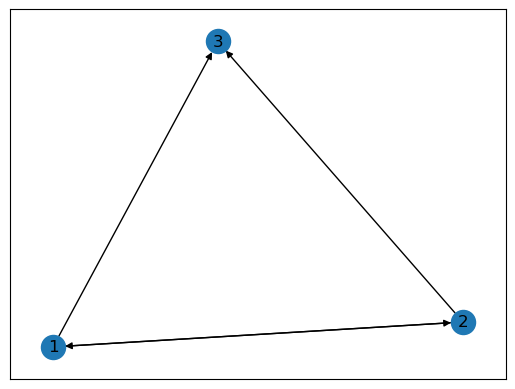

In [15]:
# drawing basic graphs
nx.draw_networkx(G, with_labels=True)
plt.show()

[(1, 2), (1, 3)]


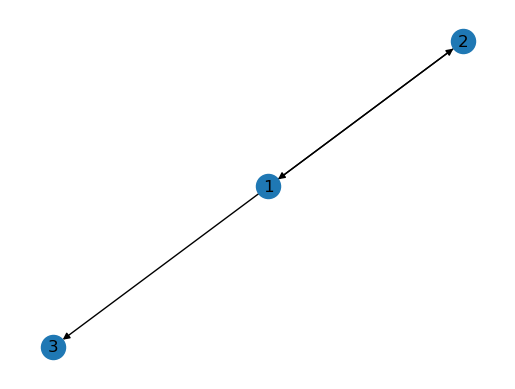

In [16]:
G = nx.DiGraph()
G.add_edges_from([(1,2), (1,3)])
print(G.edges())
G.add_edge(2,1)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

In [17]:
# creating network from adjacency matrix

# create matrix
#𝐴ij=1 if nodes i and 𝑗 are connected, Aij=0 otherwise.
adj = np.array([[0, 0, 1],
                [1, 0, 0],
                [1, 1, 0]])

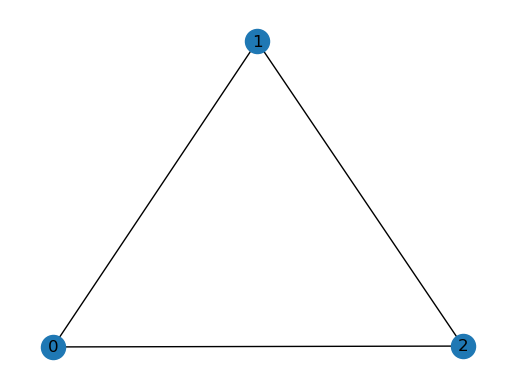

In [18]:
# create graph
G = nx.from_numpy_matrix(adj)
nx.draw_networkx(G, with_labels=True)
plt.axis('off')
plt.show()

In [19]:
#Operations

# degree
print(G.degree(0))
# a DegreeView that can be converted into a dictionary)
print(dict(G.degree()))
# only degree values
print(dict(G.degree()).values())

2
{0: 2, 1: 2, 2: 2}
dict_values([2, 2, 2])


In [20]:
# local transitivity
nx.clustering(G)

{0: 1.0, 1: 1.0, 2: 1.0}

In [21]:
# global transitivity
nx.transitivity(G)

1.0

In [22]:
# edge attributes
G = nx.Graph()
# adding two attributes
G.add_edge(1,2,weight=10,transport="bus")
G.add_edge(2,3,weight=5,transport="train")

# edge attributes of edge (1, 2)
print(G[1][2])

{'weight': 10, 'transport': 'bus'}


In [23]:
# printing edges
for e in G.edges():
    print(e)

(1, 2)
(2, 3)


In [24]:
# with attributes (data)
for e in G.edges(data=True):
    print(e)

(1, 2, {'weight': 10, 'transport': 'bus'})
(2, 3, {'weight': 5, 'transport': 'train'})


In [25]:
for [e1, e2, w] in G.edges(data=True):
    print("%d -- %d [weight=%g];" % (e1,e2,w['weight'])) # d is placeholder for decimal number, g for float

1 -- 2 [weight=10];
2 -- 3 [weight=5];


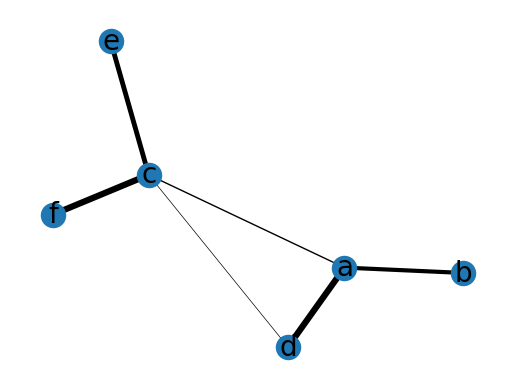

In [26]:
# plotting network elements separately

G = nx.Graph()
G.add_edge('a', 'b', weight=0.6)
G.add_edge('a', 'c', weight=0.2)
G.add_edge('c', 'd', weight=0.1)
G.add_edge('c', 'e', weight=0.7)
G.add_edge('c', 'f', weight=0.9)
G.add_edge('a', 'd', weight=0.9)

edges = [(u, v) for (u, v) in G.edges()]
weight = [d['weight']*5.0 for (u, v, d) in G.edges(data=True)]

# layout: dynamical model for node positions
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_size=300)# draw nodes
nx.draw_networkx_edges(G, pos, edgelist=edges, width=weight)# draw edges 
nx.draw_networkx_labels(G, pos, font_size=20)# draw labels 

plt.axis('off')
plt.show()

In [27]:
# diameter 
nx.diameter(G)

3

In [28]:
# average path length
nx.average_shortest_path_length(G)

1.7333333333333334

In [29]:
# considering edge weight
nx.average_shortest_path_length(G, weight="weight")

0.8733333333333334

[(0, 12, {'weight': 0.8597326546148107}), (0, 4, {'weight': 0.3564519555848745}), (0, 10, {'weight': 0.0024177285704924945}), (0, 7, {'weight': 0.6249236009013396}), (1, 2, {'weight': 0.9223002316567458}), (1, 14, {'weight': 0.4659007900583514}), (1, 19, {'weight': 0.6120650954859314}), (1, 16, {'weight': 0.025778353295217826}), (2, 15, {'weight': 0.7014267542187642}), (2, 6, {'weight': 0.2943323831536462}), (3, 19, {'weight': 0.39227336974386073}), (3, 6, {'weight': 0.3169660880523736}), (3, 9, {'weight': 0.5217575592517221}), (3, 16, {'weight': 0.25064516541347504}), (4, 19, {'weight': 0.47832543308844877}), (4, 5, {'weight': 0.1885551180432442}), (4, 13, {'weight': 0.1600899430729491}), (4, 12, {'weight': 0.19390574519605908}), (4, 4, {'weight': 0.712811088749463}), (5, 9, {'weight': 0.9603391655532446}), (5, 17, {'weight': 0.9461541882287272}), (6, 18, {'weight': 0.9724002337280183}), (7, 16, {'weight': 0.355949905235559}), (8, 14, {'weight': 0.38844657046728237}), (9, 11, {'weight

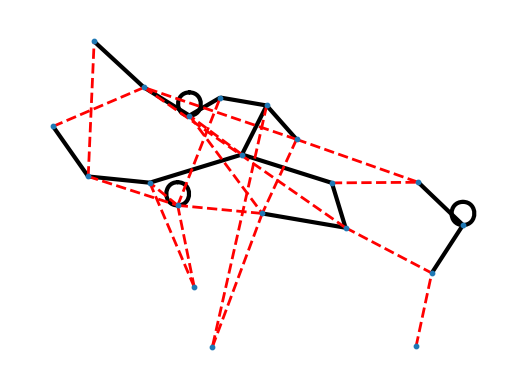

In [30]:
#Exercise: create network with x nodes and y edges with random weights

G = nx.Graph() # empty graph

G.add_nodes_from([i for i in range(20)]) # add 20 nodes

for i in range(40): # add 40 links
    node1, node2 = np.random.choice(list(G.nodes()),2)
    G.add_edge(node1,node2)

for i,j, data in G.edges(data=True): # add weights to edges
    data['weight'] = np.random.random()

print(list(G.edges(data=True)))

elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

pos = nx.spring_layout(G)

# plotting
nx.draw_networkx_nodes(G, pos, node_size=10)
nx.draw_networkx_edges(G, pos, edgelist=elarge, width=3)
nx.draw_networkx_edges(G, pos, edgelist=esmall,
                       width=2, alpha=1, edge_color='r', style='dashed')

plt.axis('off')
plt.show()

## Model networks

In [44]:
# Model networks

#random graph networks
# create random graph with 100 nodes and prob of edge p=0.01
G = nx.erdos_renyi_graph(100, 0.01)

In [45]:
# create list of node degrees
x = [G.degree([i][0]) for i in range(len(G))]
print(x)

[3, 0, 0, 1, 1, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 1, 4, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 2, 1, 0, 1, 1, 0]


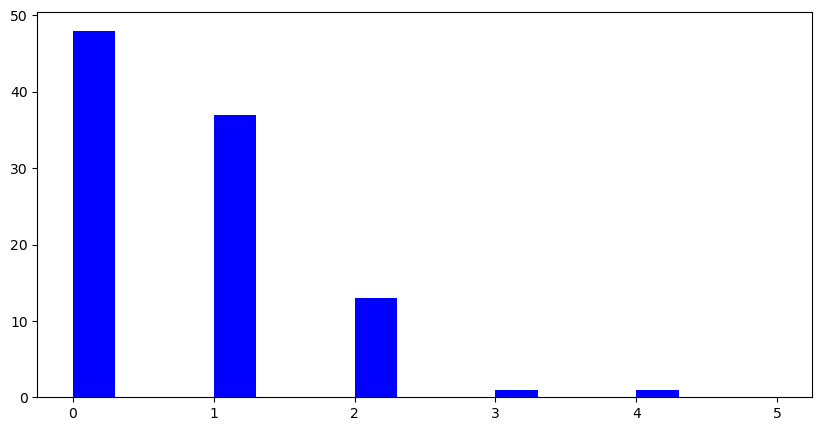

In [46]:
# plot histogram with degree distribution
plt.figure(figsize=[10,5])
plt.hist(x, facecolor='b', bins=5, range=(0,5), width=0.3)
plt.show()


(array([48., 37., 14.,  1.,  0.]),
 array([-1. ,  0.4,  1.8,  3.2,  4.6,  6. ]),
 <BarContainer object of 5 artists>)

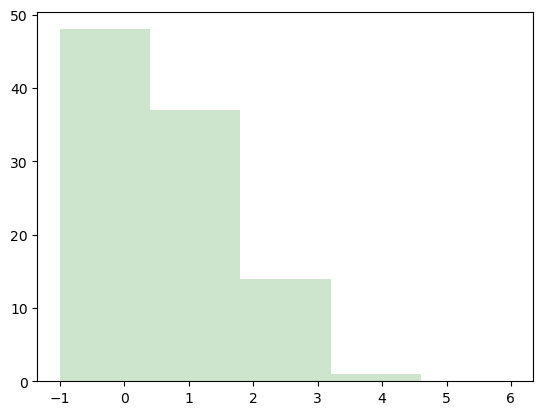

In [47]:
# alternative
degree = np.array(G.degree())[:,1:]
plt.hist(degree, 5, range=(-1,6), density=False, facecolor='g', alpha=.2)
#plt.show()

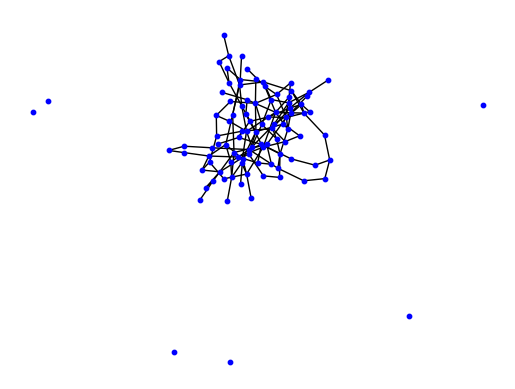

In [35]:
# printing
ER_graph=nx.erdos_renyi_graph(100, 0.03)
nx.draw_networkx(ER_graph, with_labels=False,node_size=10, node_color='b')
plt.axis('off')
plt.show()

In [36]:
for c in nx.connected_components(ER_graph):
    print(c)
#how many components
len(sorted(nx.connected_components(ER_graph)))

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99}
{20}
{35}
{41}
{47}
{70}
{78}


7

In [37]:
# betweeness centrality
nx.betweenness_centrality(ER_graph)

{0: 0.010905325005510533,
 1: 0.052284685355186294,
 2: 0.007733555182534774,
 3: 0.03662314460088115,
 4: 0.0,
 5: 0.021849446849446848,
 6: 0.02519068233353948,
 7: 0.005545739219208606,
 8: 0.012550676836391121,
 9: 0.01596995219444199,
 10: 0.008672242345711734,
 11: 0.008295785846806255,
 12: 0.026857087231236892,
 13: 0.027962406703903302,
 14: 0.07006672580265655,
 15: 0.03517254665213849,
 16: 0.024166786396223626,
 17: 0.04499195060419548,
 18: 0.008166046601420751,
 19: 0.03459546877914225,
 20: 0.0,
 21: 0.05595014624853833,
 22: 0.0,
 23: 0.038682448360865165,
 24: 0.0582729628647996,
 25: 0.11013021370164229,
 26: 0.02496666535782181,
 27: 0.015285511860960221,
 28: 0.004807059909100725,
 29: 0.026386312100597813,
 30: 0.01135889180106867,
 31: 0.007045348201810788,
 32: 0.06044608407007912,
 33: 0.003442589156874871,
 34: 0.04039242440602983,
 35: 0.0,
 36: 0.0709237551770019,
 37: 0.002541694888633664,
 38: 0.0,
 39: 0.024231789878048377,
 40: 0.054354623479546164,
 41: 

Other centrality measures here:

https://networkx.org/documentation/stable/reference/algorithms/centrality.html?highlight=closeness%20centrality

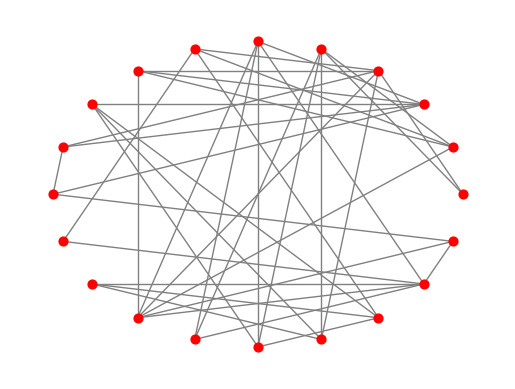

In [38]:
#small-world network
#IMPORTANT, nei=number of neighbours on BOTH sides 
#different from R where nei= neighbours on EACH side

SW_graph = nx.watts_strogatz_graph(20, 4, 1)
circular = nx.circular_layout(SW_graph)
nx.draw_networkx(SW_graph, with_labels=False,node_size=40, node_color='r', 
                 pos=circular, edge_color='grey')
plt.axis('off')
plt.show()

## Importing data from txt files

In [39]:
#importing
camp1 = 'hgcamp.txt'
HG =nx.read_weighted_edgelist((camp1), nodetype=int)
print(nx.info(HG))

Graph with 53 nodes and 477 edges


/var/folders/pb/csxhkt_j7zg014q0zhg0hj180000gp/T/ipykernel_6155/918308943.py:4: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(HG))


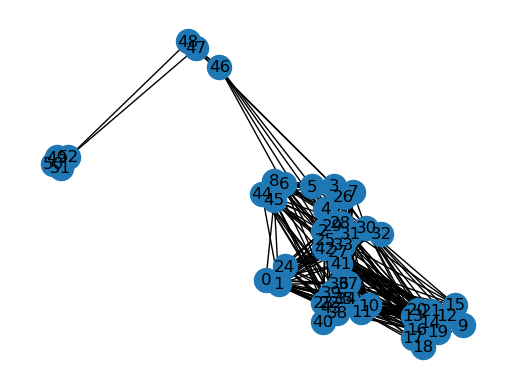

In [40]:
nx.draw_networkx(HG, with_labels=True)
plt.axis('off')
plt.show()

In [41]:
print(nx.info(HG))

Graph with 53 nodes and 477 edges


/var/folders/pb/csxhkt_j7zg014q0zhg0hj180000gp/T/ipykernel_6155/1580521290.py:1: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(HG))


# Exercises

#### Using the HG network:  

* Print a list with the list of neighbours of nodes 0, 1, 2

In [48]:
for n in range(0, 3, 1):
    print(f"neighbours of node {n}: {list(HG.neighbors(n))}")

neighbours of node 0: [1, 2, 11, 20, 22, 23, 24, 25, 27, 31, 32, 33, 35, 36, 37, 38, 41, 43, 45]
neighbours of node 1: [0, 2, 11, 13, 20, 22, 23, 24, 25, 27, 31, 33, 35, 37, 38, 41, 42, 43, 44, 45]
neighbours of node 2: [0, 1, 3, 4, 6, 7, 8, 15, 16, 21, 24, 25, 26, 27, 28, 29, 30, 31, 33, 35, 36, 37, 41, 42, 44, 46]


* Print a list with each node and its degree 

In [51]:
[{"node":node, "degree":HG.degree(node)} for node in HG.nodes()]

[{'node': 0, 'degree': 19},
 {'node': 1, 'degree': 20},
 {'node': 2, 'degree': 26},
 {'node': 11, 'degree': 25},
 {'node': 20, 'degree': 26},
 {'node': 22, 'degree': 23},
 {'node': 23, 'degree': 19},
 {'node': 24, 'degree': 13},
 {'node': 25, 'degree': 28},
 {'node': 27, 'degree': 37},
 {'node': 31, 'degree': 32},
 {'node': 32, 'degree': 8},
 {'node': 33, 'degree': 23},
 {'node': 35, 'degree': 22},
 {'node': 36, 'degree': 27},
 {'node': 37, 'degree': 34},
 {'node': 38, 'degree': 24},
 {'node': 41, 'degree': 29},
 {'node': 43, 'degree': 23},
 {'node': 45, 'degree': 13},
 {'node': 13, 'degree': 26},
 {'node': 42, 'degree': 15},
 {'node': 44, 'degree': 16},
 {'node': 3, 'degree': 19},
 {'node': 4, 'degree': 17},
 {'node': 6, 'degree': 15},
 {'node': 7, 'degree': 16},
 {'node': 8, 'degree': 12},
 {'node': 15, 'degree': 14},
 {'node': 16, 'degree': 22},
 {'node': 21, 'degree': 17},
 {'node': 26, 'degree': 16},
 {'node': 28, 'degree': 26},
 {'node': 29, 'degree': 23},
 {'node': 30, 'degree':

* Now print a list only with the degree values

In [55]:
degrees = [HG.degree(node) for node in HG.nodes()]
degrees = dict(HG.degree()).values() # other approach
print(degrees)

[19, 20, 26, 25, 26, 23, 19, 13, 28, 37, 32, 8, 23, 22, 27, 34, 24, 29, 23, 13, 26, 15, 16, 19, 17, 15, 16, 12, 14, 22, 17, 16, 26, 23, 27, 6, 13, 4, 4, 13, 13, 16, 17, 11, 15, 26, 12, 19, 19, 5, 3, 3, 3]


* Plot a histogram with degree values

Text(0.5, 1.0, 'degree distribution of network')

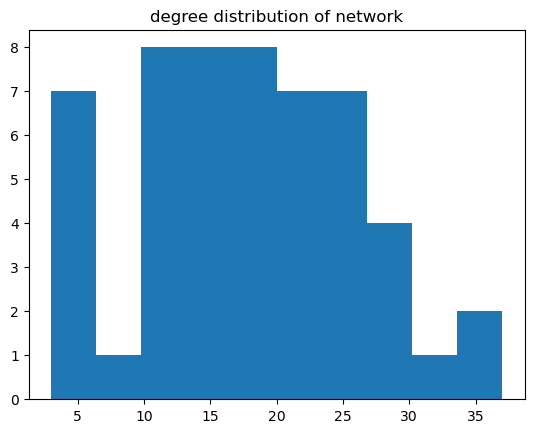

In [57]:
plt.hist(degrees)
plt.title("degree distribution of network")

* Calculate transitivity for each node

In [58]:
nx.clustering(HG)

{0: 0.7134502923976608,
 1: 0.6789473684210526,
 2: 0.5076923076923077,
 11: 0.6,
 20: 0.5784615384615385,
 22: 0.7114624505928854,
 23: 0.783625730994152,
 24: 0.6923076923076923,
 25: 0.5476190476190477,
 27: 0.45795795795795796,
 31: 0.5282258064516129,
 32: 0.8214285714285714,
 33: 0.6086956521739131,
 35: 0.7402597402597403,
 36: 0.6182336182336182,
 37: 0.5133689839572193,
 38: 0.5471014492753623,
 41: 0.583743842364532,
 43: 0.6482213438735178,
 45: 0.6538461538461539,
 13: 0.5661538461538461,
 42: 0.6857142857142857,
 44: 0.575,
 3: 0.5789473684210527,
 4: 0.7279411764705882,
 6: 0.6190476190476191,
 7: 0.8416666666666667,
 8: 0.6818181818181818,
 15: 0.7582417582417582,
 16: 0.6406926406926406,
 21: 0.7132352941176471,
 26: 0.8416666666666667,
 28: 0.5138461538461538,
 29: 0.5770750988142292,
 30: 0.5213675213675214,
 46: 0.4,
 5: 0.7692307692307693,
 47: 0.5,
 48: 0.5,
 40: 0.8717948717948718,
 9: 0.8333333333333334,
 12: 0.7666666666666667,
 14: 0.7573529411764706,
 18: 0.92

* Calculate the global transitivity of HG

In [59]:
nx.transitivity(HG)

0.6152521774356897

* Calculate the diameter and average path length of HG

In [60]:
# diameters
nx.diameter(HG)

6

In [61]:
# average path length
nx.average_shortest_path_length(HG)

2.032656023222061

* Calculate the betweenness centrality of all nodes and make a histogram with values

Text(0.5, 1.0, 'betweenness distribution')

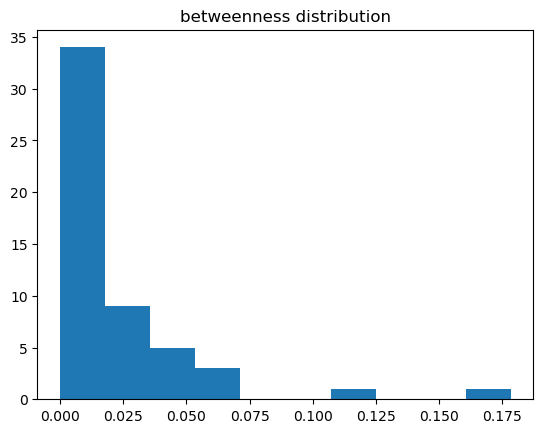

In [70]:
# betweeness centrality
betweenness = nx.betweenness_centrality(HG)
plt.hist(betweenness.values())
plt.title("betweenness distribution")

* Make a plot of betweenness (Y axis) by degree (X axis) for all HG nodes

Text(0.5, 1.0, 'betweenness as function of degree')

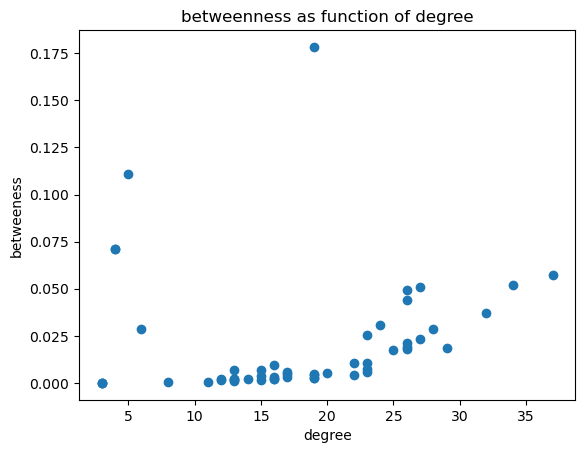

In [71]:
plt.scatter(degrees, betweenness.values())
plt.xlabel("degree")
plt.ylabel("betweeness")
plt.title("betweenness as function of degree")
# random betweenness if degree is low, intermediate degree betweenness is low, the for high deg betweenness increases

In [66]:
degree

array([[3],
       [0],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [4],
       [0],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [1],
       [0],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
    